In [1]:
import sys
sys.path.append('C:\\Users\\elisa\\Documents\\git\\gempy')

import gempy as gp
#import vtk


import numpy as np
import matplotlib.pyplot as plt
#import evtk
#%matplotlib inline
sys.path.append('C:\\Users\\elisa\\Documents\\git\\mplstereonet')
import mplstereonet

C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implemen

Active grids: ['regular']
Fault colors changed. If you do not like this behavior, set change_color to False.
Active grids: ['regular' 'topography' 'sections']
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!


C:\Users\elisa\Documents\git\gempy\gempy\core\solution.py:253: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')
C:\Users\elisa\Documents\git\gempy\gempy\core\solution.py:253: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')
C:\Users\elisa\Documents\git\gempy\gempy\core\solution.py:253: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')


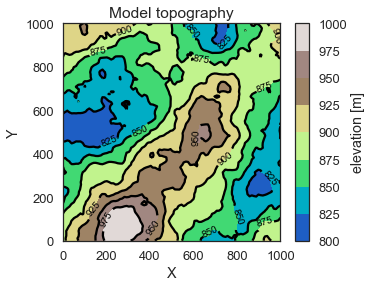

In [2]:
hallo = [0,1000,0,1000,0,1000]
res = (5,5,5)
geo_model = gp.create_model('Model_Tuto1-1')
gp.init_data(geo_model, extent=hallo,resolution = res,
                         path_i = "C:\\Users\\elisa\\Documents\\git\\GemPy_Prototyping\\input_data\\faultuncertainty_interfaces_surface.csv",
                         path_o = "C:\\Users\\elisa\\Documents\\git\\GemPy_Prototyping\\input_data\\faultuncertainty_orient_surface.csv")
gp.map_series_to_surfaces(geo_model, {'fault_series':'fault','form_series':('layer2','layer1','basement')})
geo_model.set_is_fault(['fault_series'])
geo_model.grid.set_section_grid({'s1':([0,200],[1000,200],[200,200])})
geo_model.set_topography(source='random', resolution = np.array([90,100]))
gp.set_interpolation_data(geo_model,
                          output='geology', compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])
sol = gp.compute_model(geo_model, compute_mesh=True)

### Problem: no legend when show_legend is True
Solved

no orient
after plot_orientations [432. 288.]
[432. 288.]


<Figure size 432x288 with 0 Axes>

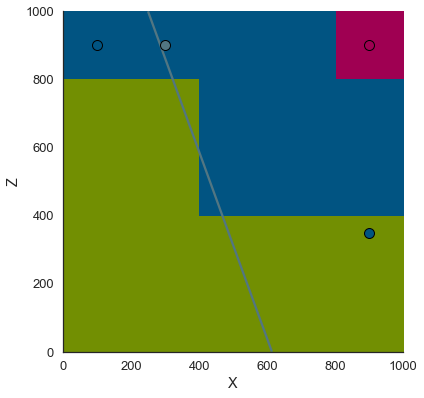

In [9]:
gp.plot.plot_section(geo_model, cell_number=4, show_legend=False)

### Problem: plot section traces returns two plots

In [ ]:
gp.plot.plot_section_traces(geo_model, show_data=True)

### Problem: Plot size differs when there are no orientations

no orient
after plot_orientations [432. 288.]
[432. 288.]


<Figure size 432x288 with 0 Axes>

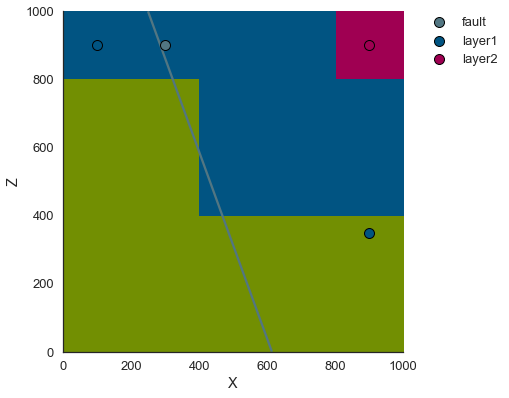

In [4]:
gp.plot.plot_section(geo_model, cell_number=4)

No handles with labels found to put in legend.


hello
before plot orient [432. 288.]
after plot_orientations [432. 288.]


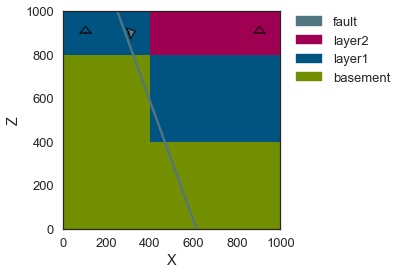

In [5]:
gp.plot.plot_section(geo_model, cell_number=2)

hello
after plot_orientations [432. 432.]


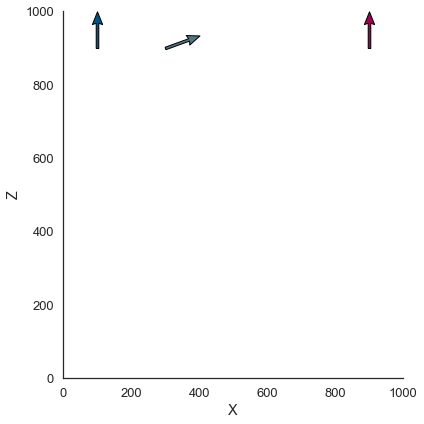

In [5]:
gp.plot.plot_data(geo_model, data_type='orientations', at='block_section')

[432. 288.]


<Figure size 432x288 with 0 Axes>

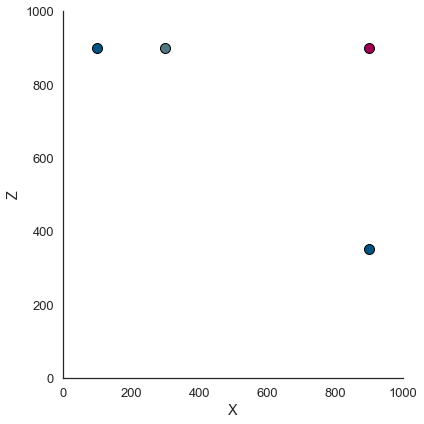

In [6]:
gp.plot.plot_data(geo_model, data_type='surface_points', at='block_section', cell_number=4)